In [2]:
import tensorflow as tf
import os
from pathlib import Path
# from tqdm import tqdm

In [3]:
import pandas as pd
# import numpy as np

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Sequential, layers

In [5]:
train_dir = Path("C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/train")
test_dir = Path("C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1")

In [6]:
train_df = pd.DataFrame({'image_name':os.listdir(train_dir)})
train_df['label'] =train_df['image_name'].apply(lambda x: x.split('.')[0])
train_df

,image_name,label
0,cat,cat
1,dog,dog


In [7]:
test_df = pd.DataFrame({'image_name':os.listdir(test_dir)})
test_df['label'] =test_df['image_name'].apply(lambda x: x.split('.')[0])
test_df

,image_name,label
0,1.jpg,1
1,10.jpg,10
2,100.jpg,100
3,1000.jpg,1000
4,10000.jpg,10000
...,...,...
12495,9995.jpg,9995
12496,9996.jpg,9996
12497,9997.jpg,9997
12498,9998.jpg,9998


In [8]:
# dog_path_train = os.path.join(train_dir, 'dog')
# os.mkdir(dog_path_train)
# dog_df_train = train_df[train_df.label=='dog']


In [9]:
# for n in tqdm(dog_df_train.image_name):
#     os.rename((os.path.join(train_dir, n)), (os.path.join(dog_path_train, n)))

In [10]:
# cat_path_train = os.path.join(train_dir, 'cat')
# os.mkdir(cat_path_train)
# cat_df_train = train_df[train_df.label=='cat']


In [11]:
# for n in tqdm(cat_df_train.image_name):
#     os.rename((os.path.join(train_dir, n)), (os.path.join(cat_path_train, n)))

In [12]:
train_datagen = ImageDataGenerator(rescale= 1./255, validation_split= 0.3)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (150, 150),
    class_mode='binary',
    subset='training'
)

Found 17500 images belonging to 2 classes.


In [14]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (150, 150),
    class_mode= 'binary',
    subset= 'validation'
)

Found 7500 images belonging to 2 classes.


In [15]:
model = Sequential([
    layers.Conv2D(16, (3,3), activation= 'relu', input_shape =(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation= 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation= 'relu'),
    layers.Dense(1,activation= 'sigmoid'),
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [17]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(learning_rate= 0.001),
              metrics= ['accuracy']
             )

In [18]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('val_accuracy')>=0.90:
            self.model.stop_training = True
            
callback = mycallback()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//50,#batch_size, 
    epochs = 30,
    verbose=1,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//50,#batch_size,
    callbacks=[callback]
)

Epoch 1/30
350/350 [==============================] - 983s 3s/step - loss: 0.6645 - accuracy: 0.6001 - val_loss: 0.6064 - val_accuracy: 0.6590
Epoch 2/30
350/350 [==============================] - 684s 2s/step - loss: 0.5875 - accuracy: 0.6891 - val_loss: 0.5247 - val_accuracy: 0.7431
Epoch 3/30
350/350 [==============================] - 605s 2s/step - loss: 0.5221 - accuracy: 0.7397 - val_loss: 0.5003 - val_accuracy: 0.7481
Epoch 4/30
350/350 [==============================] - 639s 2s/step - loss: 0.4635 - accuracy: 0.7781 - val_loss: 0.4901 - val_accuracy: 0.7658
Epoch 5/30
350/350 [==============================] - 604s 2s/step - loss: 0.4204 - accuracy: 0.8081 - val_loss: 0.4096 - val_accuracy: 0.8129
Epoch 6/30
350/350 [==============================] - 601s 2s/step - loss: 0.3838 - accuracy: 0.8282 - val_loss: 0.3986 - val_accuracy: 0.8208
Epoch 7/30
350/350 [==============================] - 616s 2s/step - loss: 0.3543 - accuracy: 0.8442 - val_loss: 0.3707 - val_accuracy: 0.8415

In [ ]:
import matplotlib.pyplot as plt

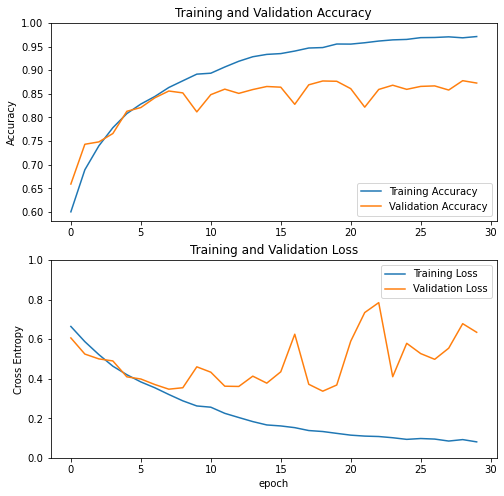

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

#new = Path.('\dogs-vs-cats\test1')

images = os.listdir(r'C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1')
print(images)



['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg', '1001.jpg', '10010.jpg', '10011.jpg', '10012.jpg', '10013.jpg', '10014.jpg', '10015.jpg', '10016.jpg', '10017.jpg', '10018.jpg', '10019.jpg', '1002.jpg', '10020.jpg', '10021.jpg', '10022.jpg', '10023.jpg', '10024.jpg', '10025.jpg', '10026.jpg', '10027.jpg', '10028.jpg', '10029.jpg', '1003.jpg', '10030.jpg', '10031.jpg', '10032.jpg', '10033.jpg', '10034.jpg', '10035.jpg', '10036.jpg', '10037.jpg', '10038.jpg', '10039.jpg', '1004.jpg', '10040.jpg', '10041.jpg', '10042.jpg', '10043.jpg', '10044.jpg', '10045.jpg', '10046.jpg', '10047.jpg', '10048.jpg', '10049.jpg', '1005.jpg', '10050.jpg', '10051.jpg', '10052.jpg', '10053.jpg', '10054.jpg', '10055.jpg', '10056.jpg', '10057.jpg', '10058.jpg', '10059.jpg', '1006.jpg', '10060.jpg', '10061.jpg', '10062.jpg', '10063.jpg', '10064.jpg', '10065.jpg', '10066.jpg', '10067.jpg', '

In [ ]:
for i in images:
    print()
    # predicting images
    path = r'C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1/' + i
    # print(path)
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    results = []
    if classes[0]>0.5:
        results.append('Dog')
    if classes[0]< 0.5:
        results.append('Cat')

[0.9252169]

C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1/10058.jpg
[0.9999528]

C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1/10059.jpg
[0.9596389]

C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1/1006.jpg
[1.]

C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1/10060.jpg
[0.9972553]

C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1/10061.jpg
[7.935273e-26]

C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1/10062.jpg
[4.4751293e-11]

C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1/10063.jpg
[1.]

C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1/10064.jpg
[1.]

C:/Users/Testys/Documents/ML_Space New_Chapter/Computer Vision/Datasets/dogs-vs-cats/test1

In [ ]:
print(results)

In [ ]:
img = os.listdir(r'C:\Users\Hp 15\Documents\My_files\Image Classification\tmp')
print(img)

In [32]:
for i in images:
    print()
    # predicting images
    path = r'C:\Users\Hp 15\Documents\My_files\Image Classification\tmp/' + i
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    results = []
    if classes[0]>0.5:
        results.append('Dog')
    else:
        results.append('Cat')

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U59'), dtype('<U59')) -> dtype('<U59')

In [ ]:
print(results)